In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px #graphing
import matplotlib.pyplot as plt #graphing
import seaborn as sns #graphing
import missingno as msno #describe data
import os
from haversine import haversine, Unit
import pyomo.environ as pyo

sns.set(rc = {"figure.figsize":(10, 6)})

In [2]:
df = pd.read_csv("celltowers.csv")

In [3]:
df.head()

id license                          address        city  \
0  20486    AT&T          S3, T12N, R10W (101378)      Tyonek   
1  20485    AT&T        MP 179 Parks Hwy (101380)    Cantwell   
2  20484    AT&T   8751 EAST MILE 6 ROAD  (94021)     Wasilla   
3  20483    AT&T          HC01 Box 2547  (101366)  Glennallen   
4  20482    AT&T  65855 Dimond Ridge Road (93995)       Homer   

              county state  structure structure_type   latitude   longitude  
0    KENAI PENINSULA    AK       50.3         LTOWER  61.164778 -151.043806  
1  MATANUSKA-SUSITNA    AK       75.6         GTOWER  63.094000 -149.507000  
2  MATANUSKA-SUSITNA    AK       30.8         MTOWER  61.680222 -149.231194  
3     VALDEZ-CORDOVA    AK       39.0         MTOWER  62.027389 -146.635556  
4    KENAI PENINSULA    AK       25.9         LTOWER  59.680472 -151.624333

In [4]:
df.shape

(19938, 10)

In [5]:
df.describe().style.background_gradient(cmap = "Purples")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19938 entries, 0 to 19937
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19938 non-null  int64  
 1   license         19938 non-null  object 
 2   address         19938 non-null  object 
 3   city            19938 non-null  object 
 4   county          19938 non-null  object 
 5   state           19938 non-null  object 
 6   structure       19938 non-null  float64
 7   structure_type  19938 non-null  object 
 8   latitude        19938 non-null  float64
 9   longitude       19938 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 1.5+ MB


In [7]:
vidor = df[df["city"] == "Vidor"].index
df.drop(vidor, inplace = True)

In [8]:
df1 = df.copy()

# Goodbye Alaska and Hawaii

hi = df1[df1["state"] == "HI"].index
ak = df1[df1["state"] == "AK"].index
vidor = df1[df1["city"] == "Vidor"].index

df1.drop(hi, inplace = True)
df1.drop(ak, inplace = True)
df1.drop(vidor, inplace = True)

Text(0.5, 1.0, 'Number of Cellular Towers by State')

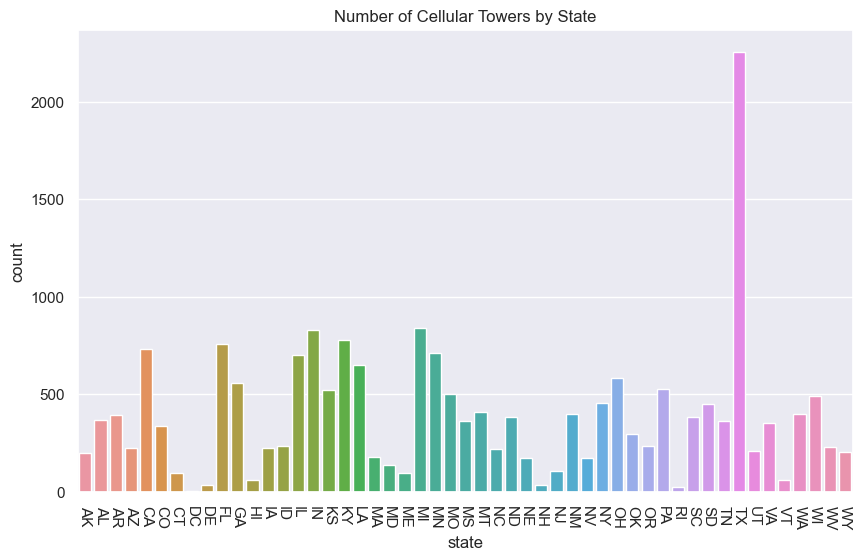

In [9]:
sorted_df = df.sort_values(by = "state", ascending = True)

plot = sns.countplot(data = sorted_df, x = "state")
plot.set_xticklabels(plot.get_xticklabels(), rotation = 270)
plt.title("Number of Cellular Towers by State")

In [10]:
for state in ["TX","MI","IN","KY","FL","CA","MN","IL","LA","OH","GA","PA","KS","MO"]:

    dfstate = df[df["state"] == state]

    fig = px.pie(dfstate, names = "license", color = "license", 
                 title = f"Cell Tower License Ownership in {state}",
                 color_discrete_map = {"AT&T": "#00A8E0", "Verizon": "#cd040b"})

    fig.update_traces(textinfo = "value+percent", textfont_size = 20,
                      marker = dict(line = dict(color = "#E2E2E2", width = 2)))

    fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))
    fig.show()

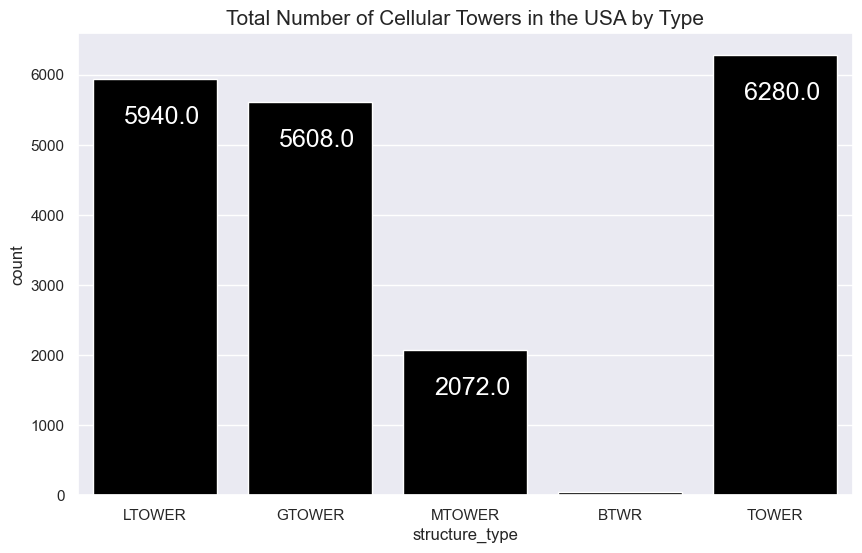

In [11]:
# Total Number of Cellular Towers in the USA by Type
ax = sns.countplot(data = df, x = "structure_type", palette = ["#000000"])
ax.set_title("Total Number of Cellular Towers in the USA by Type", fontsize = 15)

for p in ax.patches:
    ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()),
                va = "top", color = "#FFFFFF", size = 18)

plt.show()

In [16]:
fig = px.box(df, x = "structure_type", y = "structure", color = "structure_type", points = "all",
             color_discrete_sequence = ["#00E600", "#0000E6", "#E600DF", "#E6E600", "#FFFFFF"],
             title = "Cellular Tower Height (Meters) by Type")

fig.update_layout(template = "plotly_dark", yaxis_range = [0, 200], # setting range of y axis
                  font = dict(family = "PT Sans", size = 20))

fig.update_traces(fillcolor = "#000000")
fig.update_traces(marker = dict(size = 1)) # and scaling down the markers
fig.show()

In [17]:
fig = px.box(df, x = "license", y = "structure", color = "license", points = "all",
             color_discrete_sequence = ["#00A8E0", "#cd040b"],
             title = "Cellular Tower Height (Meters) by Type")

fig.update_layout(template = "plotly_dark", yaxis_range = [0, 175], # setting range of y axis
                  font = dict(family = "PT Sans", size = 20))

fig.update_traces(marker = dict(size = 1)) # and scaling down the markers
fig.show()

In [18]:
# License distribution
df.value_counts("license")

license
AT&T       12270
Verizon     7666
dtype: int64

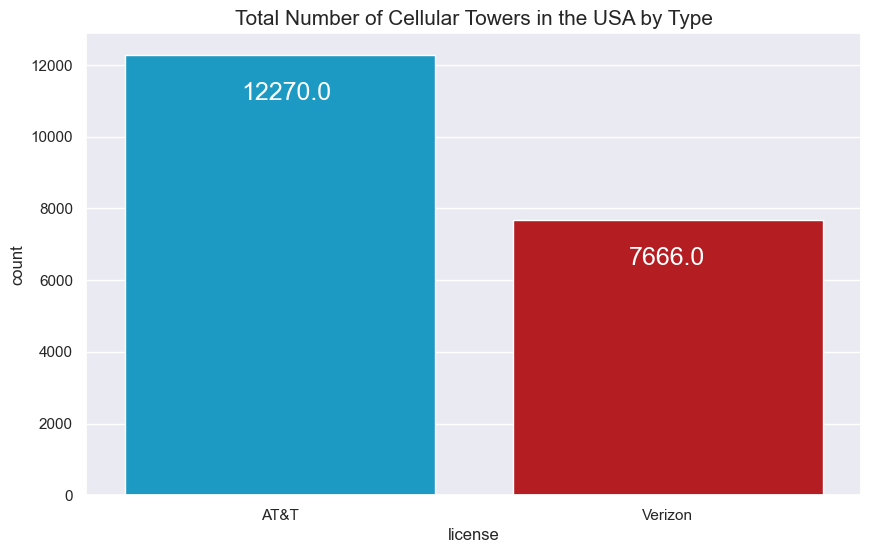

In [19]:
ax = sns.countplot(data = df, x = "license", palette = ["#00A8E0", "#cd040b"])
ax.set_title("Total Number of Cellular Towers in the USA by Type", fontsize = 15)

for p in ax.patches:
    ax.annotate(f"\n{p.get_height()}", (p.get_x() + 0.3, p.get_height()),
                va = "top", color = "#FFFFFF", size = 18)

plt.show()

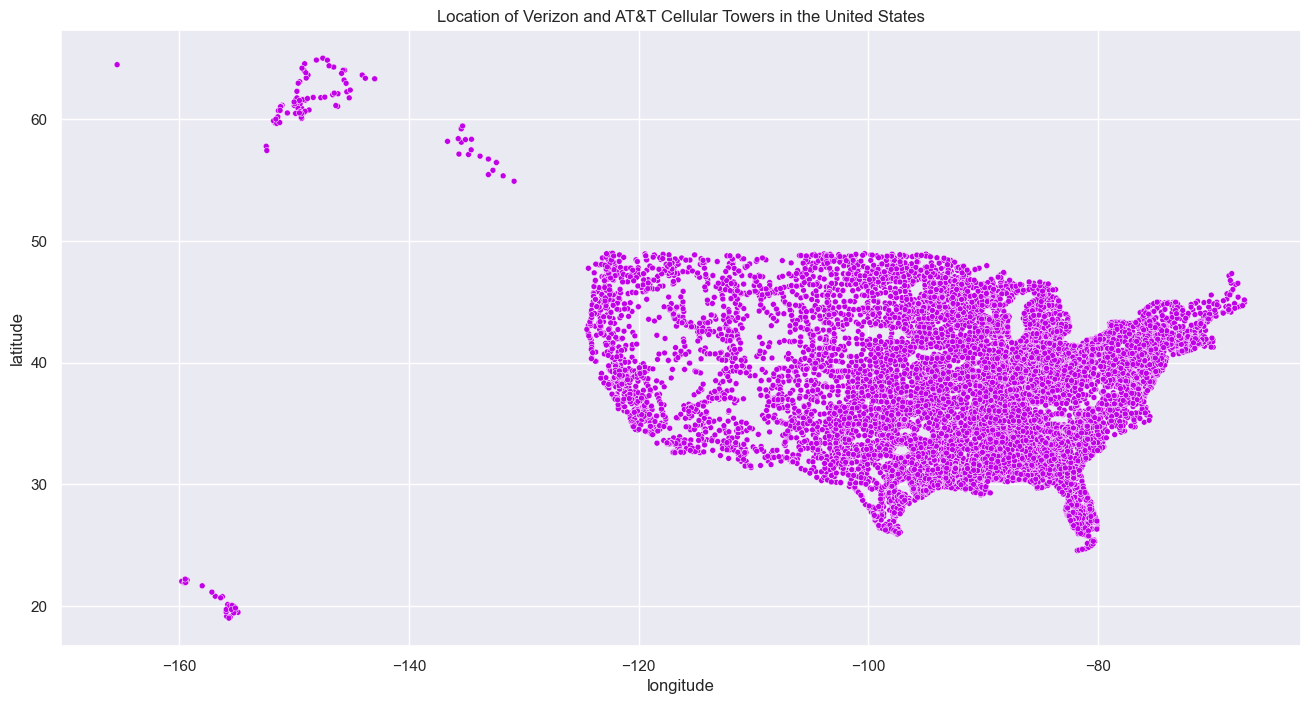

In [20]:
plt.figure(figsize = (16, 8))
sns.scatterplot(data = df, x = "longitude", y = "latitude", size = 2, color = ["#C000E6"])
plt.title("Location of Verizon and AT&T Cellular Towers in the United States")
plt.legend([],[], frameon = False)

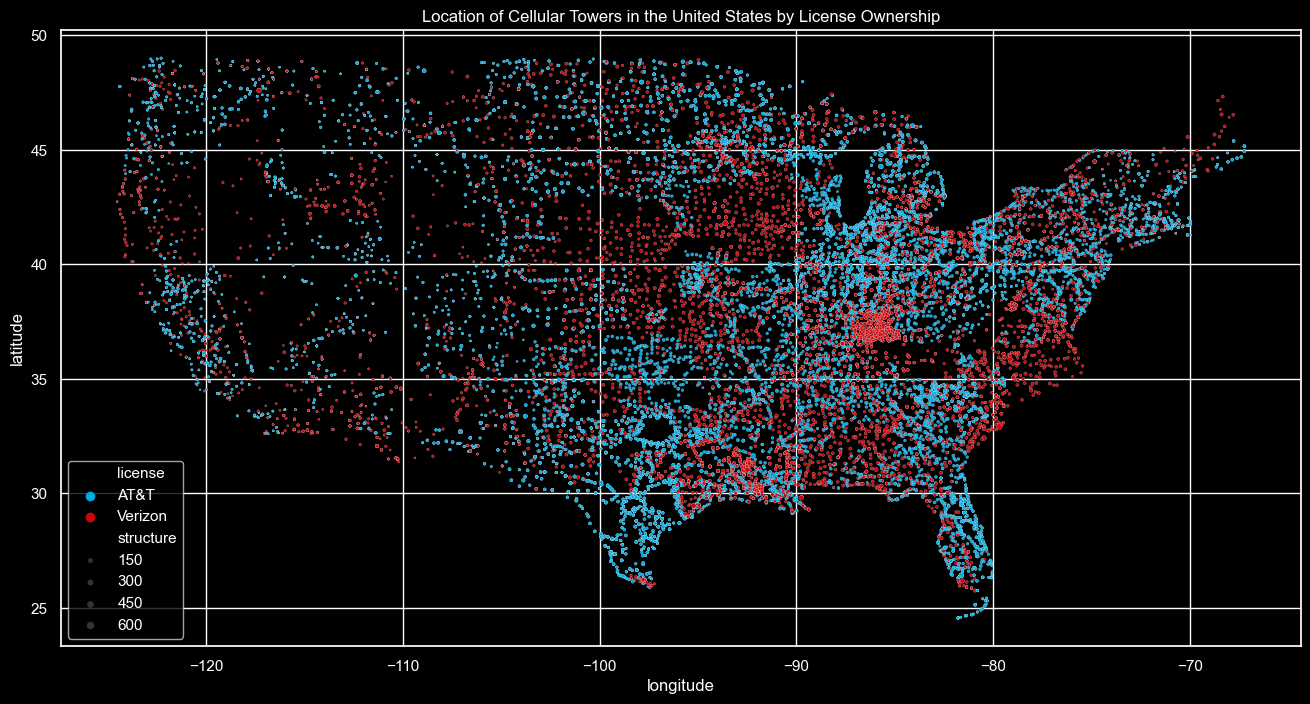

In [21]:
plt.style.use("dark_background")
plt.figure(figsize = (16, 8))
sns.scatterplot(data = df1, x = "longitude", y = "latitude", hue = "license", 
                size = "structure", sizes = (2, 20), # marker sizes
                palette = ("#00A8E0", "#cd040b"))

plt.title("Location of Cellular Towers in the United States by License Ownership")
plt.legend()

In [22]:
fig = px.scatter_3d(df1, x = "longitude", y = "latitude", z = "structure",
                    color = "structure", color_continuous_scale = "Thermal",
                    range_color = (0, 175), # range of color bar
                    title = "Location of Cellular Towers in the United States by Structure Height")

fig.update_traces(marker = dict(size = 1.25, symbol = "diamond")) # scaling down the markers
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12))
fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


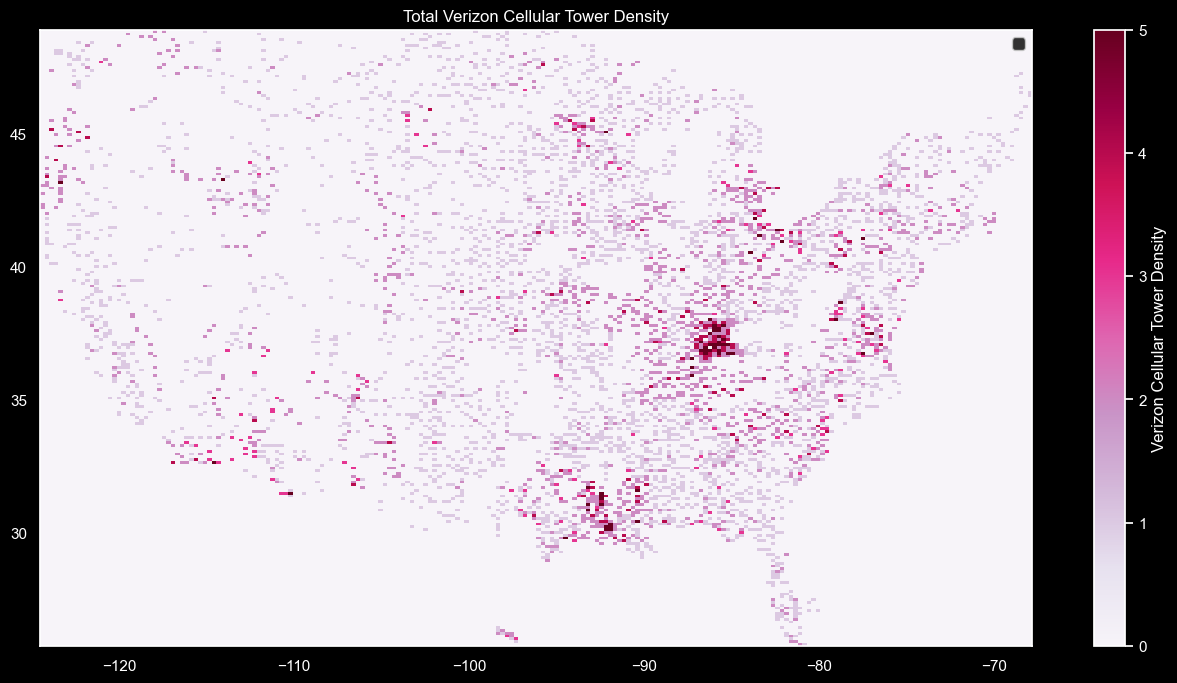

In [23]:
# Verizon Tower Density
plt.figure(figsize = (16, 8))

df0 = df1[df1["license"] == "Verizon"]

plt.hist2d(data = df0, x = "longitude", y = "latitude", bins = 220, cmap = "PuRd")
        
plt.colorbar(label = "Verizon Cellular Tower Density", orientation = "vertical") 
plt.clim(0,5) # Limits range of color bar
plt.title("Total Verizon Cellular Tower Density")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


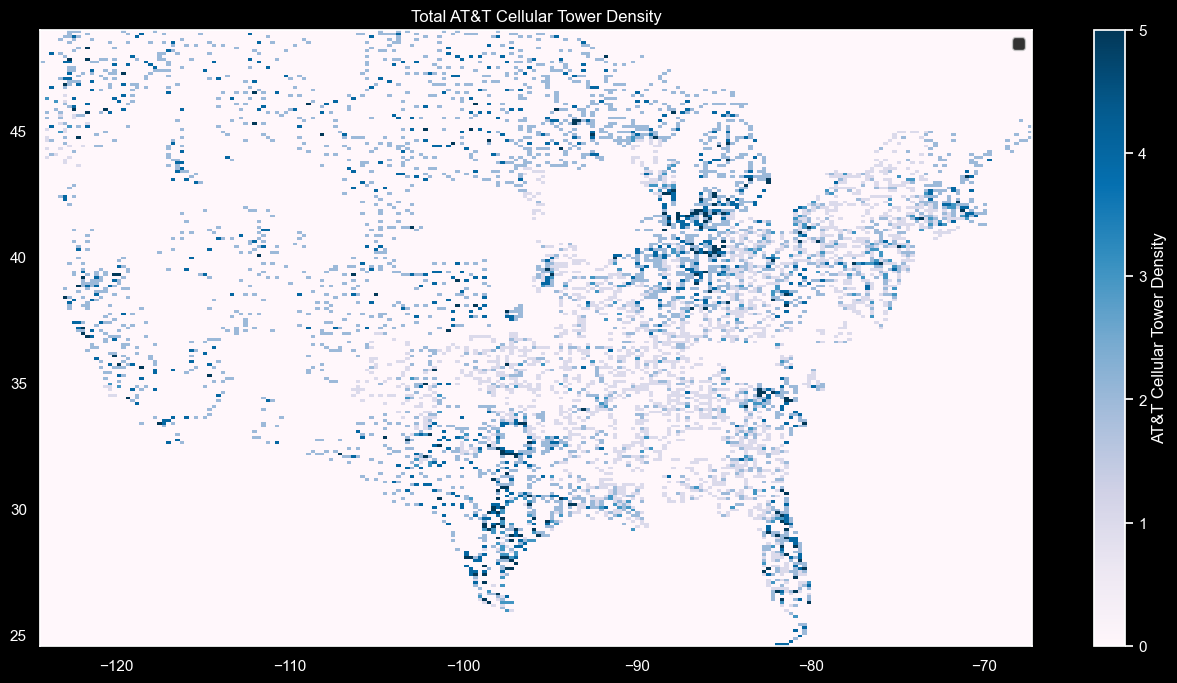

In [24]:
# AT&T Tower Density
plt.figure(figsize = (16, 8))

df0 = df1[df1["license"] == "AT&T"]

plt.hist2d(data = df0, x = "longitude", y = "latitude", bins = 220, cmap = "PuBu")

plt.colorbar(label = "AT&T Cellular Tower Density", orientation = "vertical")
plt.clim(0,5) # Limits range of color bar
plt.title("Total AT&T Cellular Tower Density")
plt.legend()

In [25]:
dfc = pd.read_csv("us2021census.csv")

In [26]:
dfc.head()

City State  Type                              Counties  Population  \
0     New York    NY  City  Bronx;Richmond;New York;Kings;Queens     8804190   
1  Los Angeles    CA  City                           Los Angeles     3898747   
2      Chicago    IL  City                           Cook;DuPage     2746388   
3      Houston    TX  City           Harris;Fort Bend;Montgomery     2304580   
4      Phoenix    AZ  City                              Maricopa     1608139   

   Latitude  Longitude  
0    40.714    -74.007  
1    34.052   -118.243  
2    41.882    -87.628  
3    29.760    -95.363  
4    33.448   -112.074

In [27]:
dfc[(dfc.Counties.str.contains('Fulton')) & (dfc.State == "GA")]

City State  Type         Counties  Population  Latitude  \
37                 Atlanta    GA  City    DeKalb;Fulton      498715    33.749   
289          Sandy Springs    GA  City           Fulton      108080    33.925   
292           South Fulton    GA  city           Fulton      107436    33.657   
365                Roswell    GA  City           Fulton       92833    34.022   
436            Johns Creek    GA  City           Fulton       82453    34.046   
593             Alpharetta    GA  City           Fulton       65818    34.076   
1017                Milton    GA  City           Fulton       41296    34.118   
1105            East Point    GA  City           Fulton       38358    33.677   
1599            Union City    GA  City           Fulton       26830    33.579   
2492              Fairburn    GA  City           Fulton       16483    33.551   
2851          College Park    GA  City   Fulton;Clayton       13930    33.653   
4772             Hapeville    GA  City           Fulton        6553    33.661   
5511              Palmetto    GA  City    Coweta;Fulton        5071    33.533   
7330   Chattahoochee Hills    GA  City           Fulton        2950    33.561   
14207        Mountain Park    GA  City  Cherokee;Fulton         583    34.083   

       Longitude  
37       -84.390  
289      -84.379  
292      -84.573  
365      -84.359  
436      -84.223  
593      -84.295  
1017     -84.270  
1105     -84.441  
1599     -84.545  
2492     -84.586  
2851     -84.449  
4772     -84.409  
5511     -84.670  
7330     -84.755  
14207    -84.414

In [28]:
dfc[(dfc.Counties.str.contains('Fulton')) & (dfc.State == "GA")].count()

City          15
State         15
Type          15
Counties      15
Population    15
Latitude      15
Longitude     15
dtype: int64

In [29]:
dfc[(dfc.City == "Atlanta") ]

City State     Type       Counties  Population  Latitude  Longitude
37     Atlanta    GA     City  DeKalb;Fulton      498715    33.749    -84.390
5307   Atlanta    TX     City           Cass        5433    33.113    -94.168
9534   Atlanta    IL     City          Logan        1669    40.264    -89.231
13323  Atlanta    IN     Town       Hamilton         712    40.213    -86.027
16053  Atlanta    MO     City          Macon         379    39.898    -92.480
18822  Atlanta    KS     City         Cowley         168    37.436    -96.767
19153  Atlanta    LA  Village           Winn         149    31.806    -92.738
19884  Atlanta    NE  Village         Phelps         106    40.368    -99.473

In [30]:
dff = dfc[(dfc.Counties.str.contains('Fulton')) & (dfc.State == "GA")]

In [31]:
dff.head()

City State  Type       Counties  Population  Latitude  Longitude
37         Atlanta    GA  City  DeKalb;Fulton      498715    33.749    -84.390
289  Sandy Springs    GA  City         Fulton      108080    33.925    -84.379
292   South Fulton    GA  city         Fulton      107436    33.657    -84.573
365        Roswell    GA  City         Fulton       92833    34.022    -84.359
436    Johns Creek    GA  City         Fulton       82453    34.046    -84.223

In [32]:
dft = pd.read_csv("celltowers.csv")

In [33]:
dfct = dft[(dft.county.str.contains('FULTON'))& (dft.state == "GA") ]

In [34]:
dfct.head()

id  license         address      city  county state  structure  \
3294  13627  Verizon  10095 CREEL RD  FAIRBURN  FULTON    GA       60.6   
3295  13632  Verizon    45 8TH ST NE   ATLANTA  FULTON    GA      152.4   
3315  13655  Verizon    45 8TH ST NE   ATLANTA  FULTON    GA      152.4   
3317  13650  Verizon  10095 CREEL RD  FAIRBURN  FULTON    GA       60.6   
3332  13642  Verizon   Williams Road  PALMETTO  FULTON    GA       53.6   

     structure_type   latitude  longitude  
3294          TOWER  33.623444 -84.705556  
3295          TOWER  33.779000 -84.386028  
3315          TOWER  33.779000 -84.386028  
3317          TOWER  33.623444 -84.705556  
3332          TOWER  33.526111 -84.624722

In [35]:
dfct3=dfct.drop_duplicates(subset=['address'])

In [36]:
dfct3.head()

id  license         address      city  county state  structure  \
3294  13627  Verizon  10095 CREEL RD  FAIRBURN  FULTON    GA       60.6   
3295  13632  Verizon    45 8TH ST NE   ATLANTA  FULTON    GA      152.4   
3332  13642  Verizon   Williams Road  PALMETTO  FULTON    GA       53.6   

     structure_type   latitude  longitude  
3294          TOWER  33.623444 -84.705556  
3295          TOWER  33.779000 -84.386028  
3332          TOWER  33.526111 -84.624722

In [37]:
dfct3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 3294 to 3332
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3 non-null      int64  
 1   license         3 non-null      object 
 2   address         3 non-null      object 
 3   city            3 non-null      object 
 4   county          3 non-null      object 
 5   state           3 non-null      object 
 6   structure       3 non-null      float64
 7   structure_type  3 non-null      object 
 8   latitude        3 non-null      float64
 9   longitude       3 non-null      float64
dtypes: float64(3), int64(1), object(6)
memory usage: 264.0+ bytes


In [38]:
dfct3 = pd.DataFrame(dfct3,columns=["id","city","state","structure_type","county","latitude","longitude"])

In [39]:
dfct3.head()

id      city state structure_type  county   latitude  longitude
3294  13627  FAIRBURN    GA          TOWER  FULTON  33.623444 -84.705556
3295  13632   ATLANTA    GA          TOWER  FULTON  33.779000 -84.386028
3332  13642  PALMETTO    GA          TOWER  FULTON  33.526111 -84.624722

In [41]:
LocID  = list(range(1, 16))

In [42]:
dff.insert(0,"LocID",LocID,True)

In [43]:
dff.head()

LocID           City State  Type       Counties  Population  Latitude  \
37       1        Atlanta    GA  City  DeKalb;Fulton      498715    33.749   
289      2  Sandy Springs    GA  City         Fulton      108080    33.925   
292      3   South Fulton    GA  city         Fulton      107436    33.657   
365      4        Roswell    GA  City         Fulton       92833    34.022   
436      5    Johns Creek    GA  City         Fulton       82453    34.046   

     Longitude  
37     -84.390  
289    -84.379  
292    -84.573  
365    -84.359  
436    -84.223

In [44]:
dfct3.rename(columns={"id":"LocID","city":"City","state":"State","structure_type":"Type","county":"Counties","latitude":"Latitude","longitude":"Longitude"},inplace=True)

In [45]:
def calcDistance (c1,c2,t1,n1,t2,n2):
    lat_lon1=(t1,n1)
    lat_lon2=(t2,n2)
    return {(c1,c2):int(haversine(lat_lon1, lat_lon2, unit=Unit.MILES))}

nparr=dff.to_numpy()

In [47]:
dff

LocID                 City State  Type         Counties  Population  \
37         1              Atlanta    GA  City    DeKalb;Fulton      498715   
289        2        Sandy Springs    GA  City           Fulton      108080   
292        3         South Fulton    GA  city           Fulton      107436   
365        4              Roswell    GA  City           Fulton       92833   
436        5          Johns Creek    GA  City           Fulton       82453   
593        6           Alpharetta    GA  City           Fulton       65818   
1017       7               Milton    GA  City           Fulton       41296   
1105       8           East Point    GA  City           Fulton       38358   
1599       9           Union City    GA  City           Fulton       26830   
2492      10             Fairburn    GA  City           Fulton       16483   
2851      11         College Park    GA  City   Fulton;Clayton       13930   
4772      12            Hapeville    GA  City           Fulton        6553   
5511      13             Palmetto    GA  City    Coweta;Fulton        5071   
7330      14  Chattahoochee Hills    GA  City           Fulton        2950   
14207     15        Mountain Park    GA  City  Cherokee;Fulton         583   

       Latitude  Longitude  
37       33.749    -84.390  
289      33.925    -84.379  
292      33.657    -84.573  
365      34.022    -84.359  
436      34.046    -84.223  
593      34.076    -84.295  
1017     34.118    -84.270  
1105     33.677    -84.441  
1599     33.579    -84.545  
2492     33.551    -84.586  
2851     33.653    -84.449  
4772     33.661    -84.409  
5511     33.533    -84.670  
7330     33.561    -84.755  
14207    34.083    -84.414

In [48]:
dfct3

LocID      City State   Type Counties   Latitude  Longitude
3294  13627  FAIRBURN    GA  TOWER   FULTON  33.623444 -84.705556
3295  13632   ATLANTA    GA  TOWER   FULTON  33.779000 -84.386028
3332  13642  PALMETTO    GA  TOWER   FULTON  33.526111 -84.624722

In [49]:
dist={}
c={}
a={}
# cov_lim is the coverage range of each tower in miles
cov_lim=10
for i in range(len(nparr)):
    c.update({nparr[i,0]:nparr[i,5]})
    for j in range(len(nparr)):
        c1=nparr[i,0]; c2=nparr[j,0];
        t1=nparr[i,6]; n1=nparr[i,7];
        t2=nparr[j,6]; n2=nparr[j,7];
        dist.update(calcDistance(c1,c2,t1,n1,t2,n2))
        if dist[c1,c2]<cov_lim:
            a.update({(c1,c2):1})
        else:
            a.update({(c1,c2):0})

NameError: name 'haversine' is not defined

In [51]:
N = nparr[:,0]
M = nparr[:,0]
P = 3

In [ ]:
# N is the set of cell tower locations
# M is the set of customer locations
# tower locations and the customer locations used the same set N and M are alias sets
# a(n,m) is 1 if n covers m based on a predefined cell tower coverage limit (miles), otherwise 0
# c is the demand of customer location m, population is used
# P is the number of cell towers in the region

def create_coverage_model(N, M, a, c, P):
    model = pyo.ConcreteModel(name="Maximal_Coverage")
    model.x = pyo.Var(N, within=pyo.Binary)
    model.z = pyo.Var(M, within=pyo.Binary)
    
    def obj_rule(mdl):
        return sum(c[m]*mdl.z[m] for m in M)
    model.obj = pyo.Objective(rule=obj_rule,sense=pyo.maximize)

    def coverage_rule(mdl, m):
        return mdl.z[m]<=sum(a[m,n]*mdl.x[n] for n in N) 
    model.demand = pyo.Constraint(M, rule=coverage_rule)

    def num_towers_rule(mdl):
        return sum(mdl.x[n] for n in N) <= P
    model.num_stores = pyo.Constraint(rule=num_towers_rule)

    return model

In [ ]:
# Create the Maximal Coverage model
model = create_coverage_model(N, M, a, c, P)

# Create the solver interface and solve the model
solver = pyo.SolverFactory("glpk")
res = solver.solve(model, tee=True)

model.x.pprint() # Print the optimal cell tower locations for Verizon
model.z.pprint() # Print if customer at each location are covered or not
model.obj() #optimal objective function value

In [ ]:
num=0.2
BBox = (dff.Longitude.min()-num,   dff.Longitude.max()+num,      
         dff.Latitude.min()-num, dff.Latitude.max()+num)

In [ ]:
fcm = plt.imread('fultoncountyGA.jpg')

In [ ]:
fig, ax = plt.subplots(figsize = (8,7))
for i in range(15):
    latitude = nparr[i,6]
    longitude= nparr[i,7]
    if (pyo.value(model.x[nparr[i,0]])) == 1:
        ax.scatter(longitude,latitude,zorder=1, alpha= 0.2, color ='red', s=19300,)
        ax.scatter(longitude,latitude,zorder=1, alpha= 1, color ='blue', s=50,)
    else:
        ax.scatter(longitude,latitude,zorder=1, alpha= 1, color ='black', s=50,)
ax.set_title('Proposed Verizon Cellular Tower Locations')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(fcm, zorder=0, extent = BBox, aspect= 'equal')
print()